In [1]:
#utils
import os
import pylab

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# this is for prudential life insurance in Hong Kong

In [2]:
train = pd.read_csv('train.csv')
test= pd.read_csv('test.csv')

In [3]:
# Data fields
# Variable
# Description
# Id
# A unique identifier associated with an application.
# Product_Info_1-7
# A set of normalized variables relating to the product applied for
# Ins_Age
# Normalized age of applicant
# Ht
# Normalized height of applicant
# Wt
# Normalized weight of applicant
# BMI
# Normalized BMI of applicant
# Employment_Info_1-6
# A set of normalized variables relating to the employment history of the applicant.
# InsuredInfo_1-6
# A set of normalized variables providing information about the applicant.
# Insurance_History_1-9
# A set of normalized variables relating to the insurance history of the applicant.
# Family_Hist_1-5
# A set of normalized variables relating to the family history of the applicant.
# Medical_History_1-41
# A set of normalized variables relating to the medical history of the applicant.
# Medical_Keyword_1-48
# A set of dummy variables relating to the presence of/absence of a medical keyword being associated with the application.
# Response
# This is the target variable, an ordinal variable relating to the final decision associated with an application

# The following variables are all categorical (nominal):

# Product_Info_1, Product_Info_2, Product_Info_3, Product_Info_5, Product_Info_6, Product_Info_7, Employment_Info_2, Employment_Info_3, Employment_Info_5, InsuredInfo_1, InsuredInfo_2, InsuredInfo_3, InsuredInfo_4, InsuredInfo_5, InsuredInfo_6, InsuredInfo_7, Insurance_History_1, Insurance_History_2, Insurance_History_3, Insurance_History_4, Insurance_History_7, Insurance_History_8, Insurance_History_9, Family_Hist_1, Medical_History_2, Medical_History_3, Medical_History_4, Medical_History_5, Medical_History_6, Medical_History_7, Medical_History_8, Medical_History_9, Medical_History_11, Medical_History_12, Medical_History_13, Medical_History_14, Medical_History_16, Medical_History_17, Medical_History_18, Medical_History_19, Medical_History_20, Medical_History_21, Medical_History_22, Medical_History_23, Medical_History_25, Medical_History_26, Medical_History_27, Medical_History_28, Medical_History_29, Medical_History_30, Medical_History_31, Medical_History_33, Medical_History_34, Medical_History_35, Medical_History_36, Medical_History_37, Medical_History_38, Medical_History_39, Medical_History_40, Medical_History_41
# The following variables are continuous:
# Product_Info_4, Ins_Age, Ht, Wt, BMI, Employment_Info_1, Employment_Info_4, Employment_Info_6, Insurance_History_5, Family_Hist_2, Family_Hist_3, Family_Hist_4, Family_Hist_5
# The following variables are discrete:

# Medical_History_1, Medical_History_10, Medical_History_15, Medical_History_24, Medical_History_32
# Medical_Keyword_1-48 are dummy variables.

In [4]:
train.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 128 entries, Id to Response
dtypes: float64(18), int64(109), object(1)
memory usage: 57.8+ MB


In [6]:
train.describe()

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,...,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,39507.211515,1.026355,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,...,0.056954,0.010054,0.045536,0.010710,0.007528,0.013691,0.008488,0.019905,0.054496,5.636837
std,22815.883089,0.160191,5.072885,0.282562,0.083107,0.739103,0.291949,0.197190,0.074239,0.089037,...,0.231757,0.099764,0.208479,0.102937,0.086436,0.116207,0.091737,0.139676,0.226995,2.456833
min,2.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,19780.000000,1.000000,26.000000,0.076923,2.000000,3.000000,1.000000,0.238806,0.654545,0.225941,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,39487.000000,1.000000,26.000000,0.230769,2.000000,3.000000,1.000000,0.402985,0.709091,0.288703,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
75%,59211.000000,1.000000,26.000000,0.487179,2.000000,3.000000,1.000000,0.567164,0.763636,0.345188,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
max,79146.000000,2.000000,38.000000,1.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


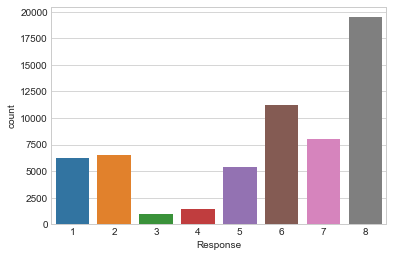

In [7]:
sns.countplot(x='Response',data=train)

# Missing Data

In [8]:
print("Feature   \t         Count\tPct missing")
for column_name, column in train.transpose().iterrows():
    naCount = sum(column.isnull())
    if naCount > 0:
       #print column_name, naCount, "Percent missing: %f%%" % 100.*naCount/train.shape[0]
       print("%20s \t%5d  \t%2.2f%%" % (column_name, naCount, 100*naCount/train.shape[0]))

Feature   	         Count	Pct missing
   Employment_Info_1 	   19  	0.03%
   Employment_Info_4 	 6779  	11.42%
   Employment_Info_6 	10854  	18.28%
 Insurance_History_5 	25396  	42.77%
       Family_Hist_2 	28656  	48.26%
       Family_Hist_3 	34241  	57.66%
       Family_Hist_4 	19184  	32.31%
       Family_Hist_5 	41811  	70.41%
   Medical_History_1 	 8889  	14.97%
  Medical_History_10 	58824  	99.06%
  Medical_History_15 	44596  	75.10%
  Medical_History_24 	55580  	93.60%
  Medical_History_32 	58274  	98.14%


Text(0,0.5,'Count')

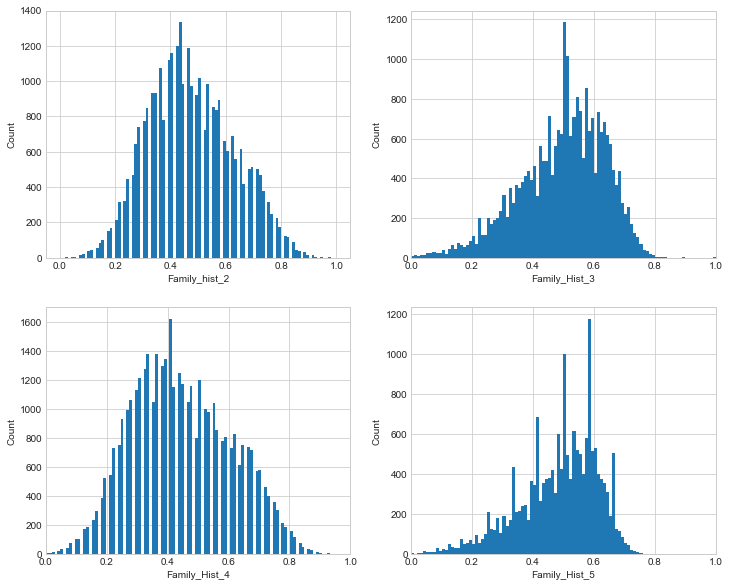

In [9]:
pylab.rcParams['figure.figsize'] = (12.0, 10)
fig,plot=plt.subplots(2,2)
train['Family_Hist_2'].plot(kind='hist',bins=100,ax=plot[0,0])
plot[0,0].set_xlabel('Family_hist_2')
plot[0,0].set_ylabel('Count')
train["Family_Hist_3"].plot(kind='hist',bins=100,xlim=(0,1),ax=plot[0,1])
plot[0,1].set_xlabel("Family_Hist_3")
plot[0,1].set_ylabel("Count")

train["Family_Hist_4"].plot(kind='hist',bins=100,xlim=(0,1),ax=plot[1,0])
plot[1,0].set_xlabel("Family_Hist_4")
plot[1,0].set_ylabel("Count")
train["Family_Hist_5"].plot(kind='hist',bins=100,xlim=(0,1),ax=plot[1,1])
plot[1,1].set_xlabel("Family_Hist_5")
plot[1,1].set_ylabel("Count")

# sepearte different kinds of  attributes to deal.


In [10]:
CATEGORICAL_COLUMNS = ["Product_Info_1", "Product_Info_2", "Product_Info_3", "Product_Info_5", "Product_Info_6",
                       "Product_Info_7", "Employment_Info_2", "Employment_Info_3", "Employment_Info_5", "InsuredInfo_1",\
                       "InsuredInfo_2", "InsuredInfo_3", "InsuredInfo_4", "InsuredInfo_5", "InsuredInfo_6", "InsuredInfo_7",\
                       "Insurance_History_1", "Insurance_History_2", "Insurance_History_3", "Insurance_History_4", "Insurance_History_7",\
                       "Insurance_History_8", "Insurance_History_9", "Family_Hist_1", "Medical_History_2", "Medical_History_3",\
                       "Medical_History_4", "Medical_History_5", "Medical_History_6", "Medical_History_7", "Medical_History_8",\
                       "Medical_History_9", "Medical_History_11", "Medical_History_12", "Medical_History_13", "Medical_History_14",\
                       "Medical_History_16", "Medical_History_17", "Medical_History_18", "Medical_History_19", "Medical_History_20",\
                       "Medical_History_21", "Medical_History_22", "Medical_History_23", "Medical_History_25", "Medical_History_26",\
                       "Medical_History_27", "Medical_History_28", "Medical_History_29", "Medical_History_30", "Medical_History_31",\
                       "Medical_History_33", "Medical_History_34", "Medical_History_35", "Medical_History_36", "Medical_History_37",\
                       "Medical_History_38", "Medical_History_39", "Medical_History_40", "Medical_History_41"]
CONTINUOUS_COLUMNS = ["Product_Info_4", "Ins_Age", "Ht", "Wt", "BMI",
                      "Employment_Info_1", "Employment_Info_4", "Employment_Info_6",
                      "Insurance_History_5", "Family_Hist_2", "Family_Hist_3", "Family_Hist_4", "Family_Hist_5"]
DISCRETE_COLUMNS = ["Medical_History_1", "Medical_History_10", "Medical_History_15", "Medical_History_24", "Medical_History_32"]

DUMMY_COLUMNS = ["Medical_Keyword_{}".format(i) for i in range(1, 48)]

In [11]:
categorical_data = pd.concat([train[CATEGORICAL_COLUMNS], test[CATEGORICAL_COLUMNS]])

continuous_data = pd.concat([train[CONTINUOUS_COLUMNS], test[CONTINUOUS_COLUMNS]])

discrete_data = pd.concat([train[DISCRETE_COLUMNS], test[DISCRETE_COLUMNS]])

dummy_data = pd.concat([train[DUMMY_COLUMNS], test[DUMMY_COLUMNS]])

# for the Categorical Data

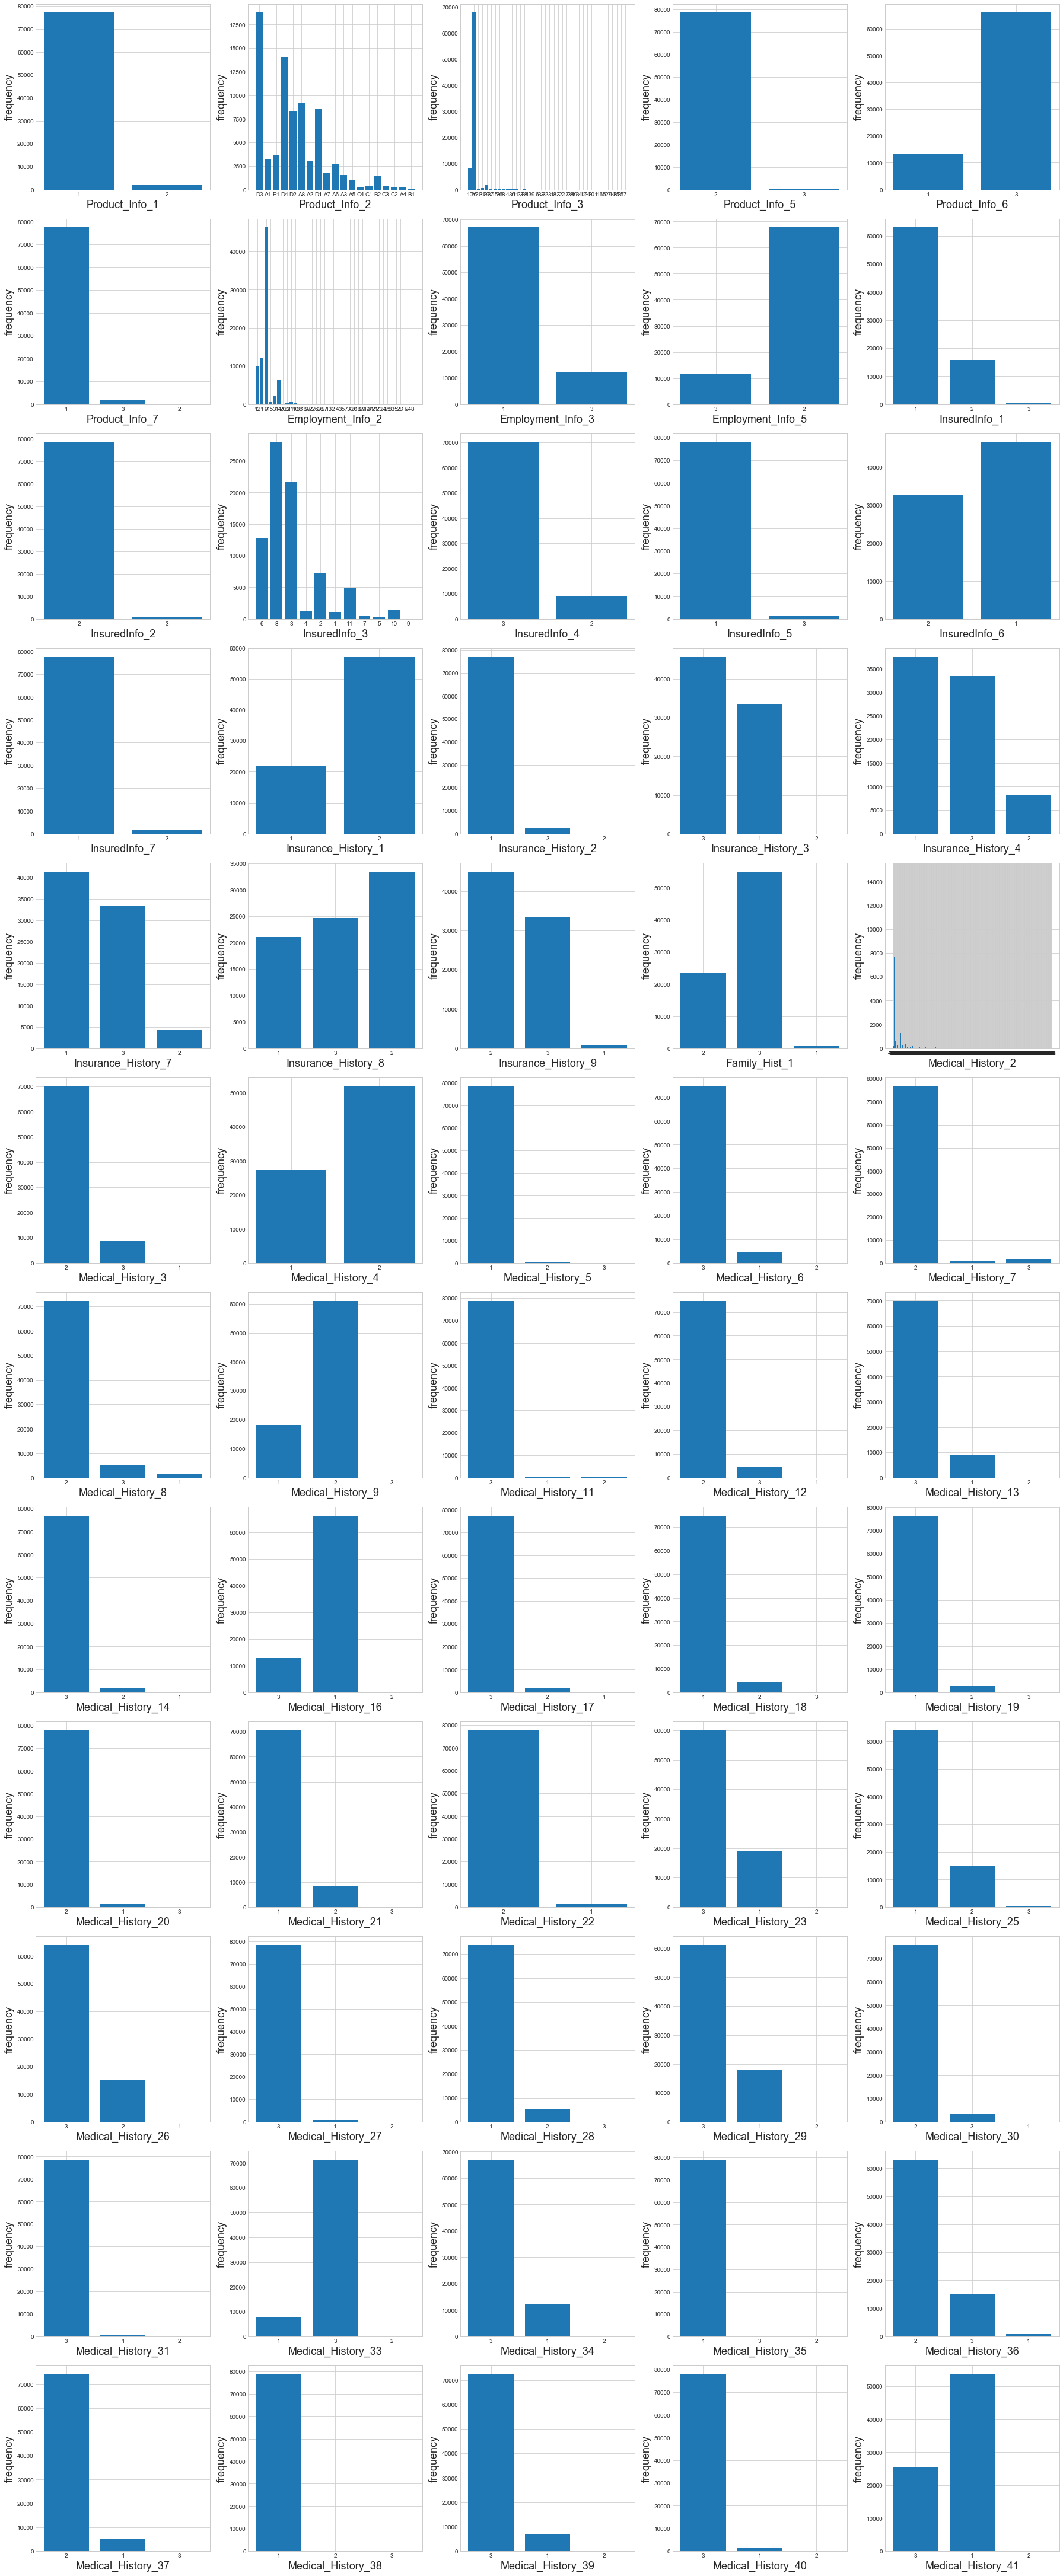

In [12]:
# there are no missing value in this section
from collections import Counter
def plot_categoricals(data):
    ncols = len(data.columns)
    fig = plt.figure(figsize=(5 * 5, 5*(ncols // 5 + 1)))
    for i, col in enumerate(data.columns):
        cnt = Counter(data[col])
        keys = list(cnt.keys())
        vals = list(cnt.values())
        plt.subplot(ncols // 5 + 1, 5, i + 1)
        plt.bar(range(len(keys)), vals, align="center")
        plt.xticks(range(len(keys)), keys)
        plt.xlabel(col, fontsize=18)
        plt.ylabel("frequency", fontsize=18)
    fig.tight_layout()
    plt.show()

plot_categoricals(categorical_data)

# For Continuous Data

In [13]:
#The following 13 columns represent continuous data:
# Product_Info_4, Ins_Age, Ht, Wt, BMI, Employment_Info_1, Employment_Info_4, 
# Employment_Info_6, Insurance_History_5, Family_Hist_2, Family_Hist_3,
# Family_Hist_4, Family_Hist_5

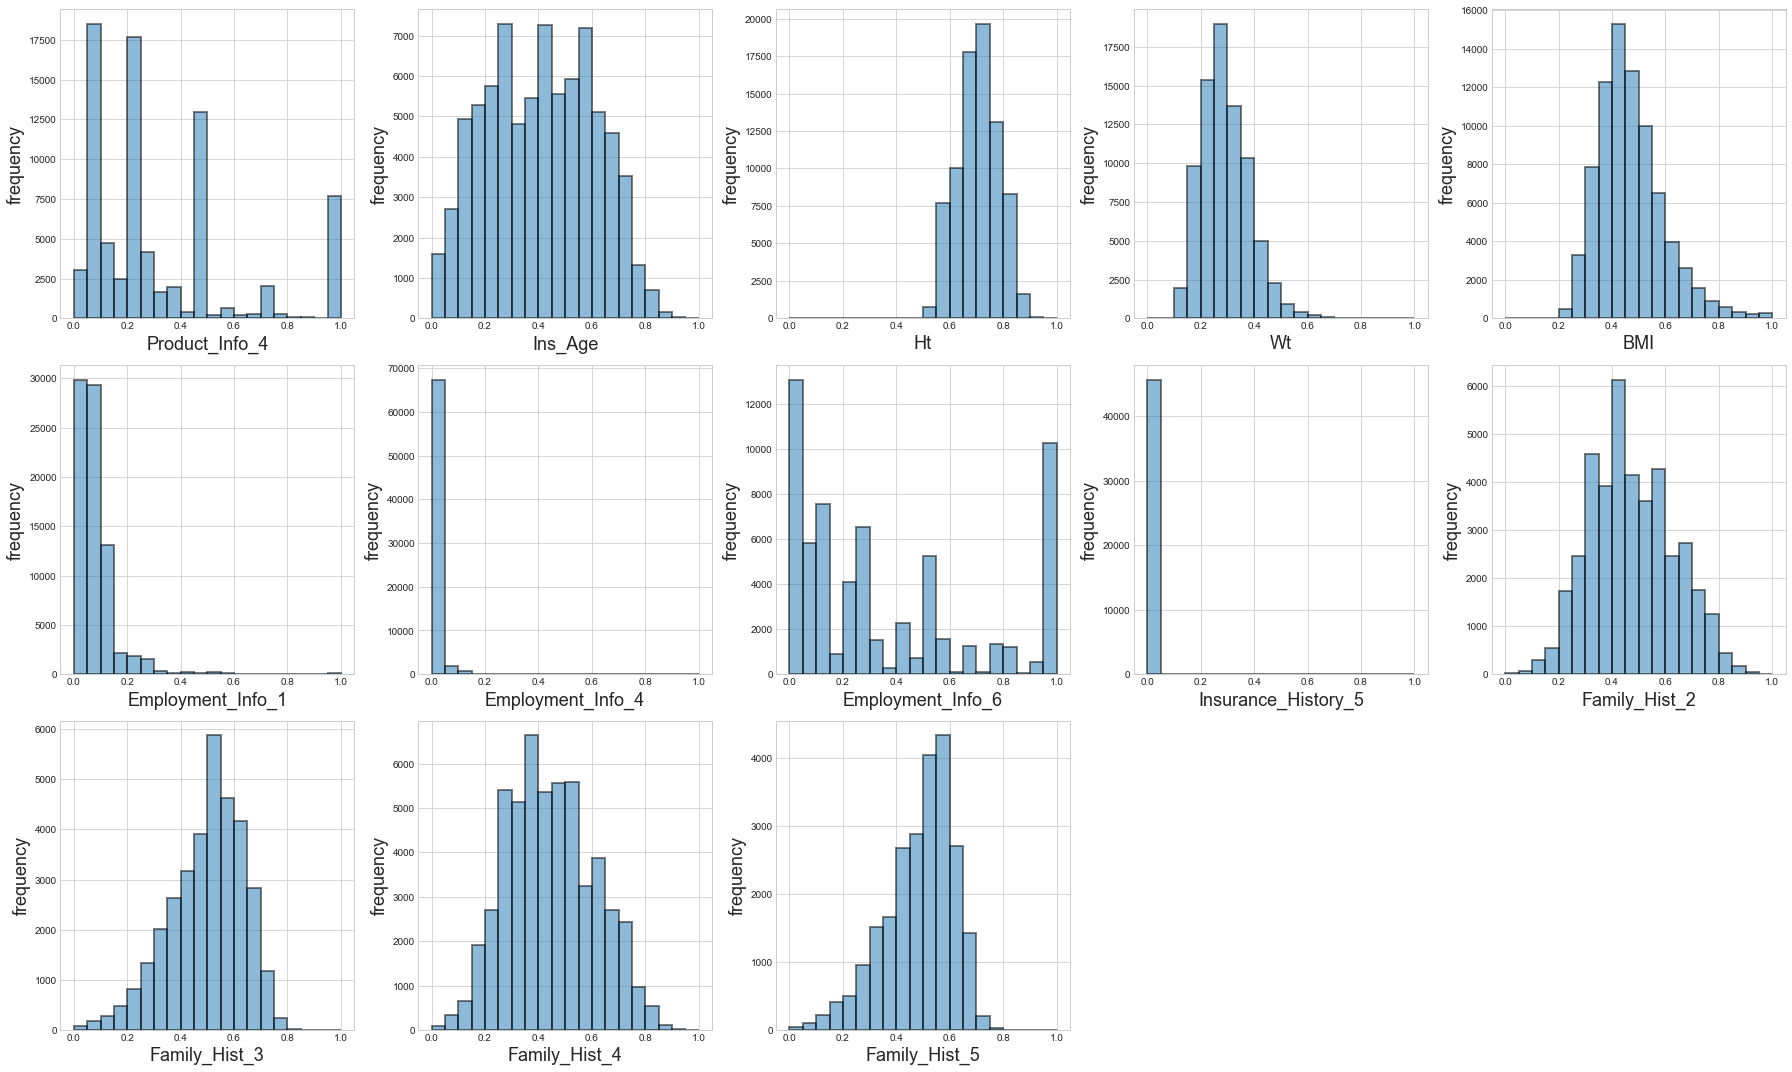

In [14]:
def plot_histgrams(data):
    ncols = len(data.columns)
    fig = plt.figure(figsize=(5 * 5, 5 * (ncols // 5 + 1)))
    for i, col in enumerate(data.columns):
        X = data[col].dropna()
        plt.subplot(ncols // 5 + 1, 5, i + 1)
        plt.hist(X, bins=20, alpha=0.5, \
                 edgecolor="black", linewidth=2.0)
        plt.xlabel(col, fontsize=18)
        plt.ylabel("frequency", fontsize=18)
    fig.tight_layout()
    plt.show()

plot_histgrams(continuous_data)

# For Discrete Data

In [15]:

# Discrete Data

# The following 5 columns represent Discrete data:
# Medical_History_1, Medical_History_10, Medical_History_15, Medical_History_24, Medical_History_32
# Medical_Keyword_1-48 are dummy variables.

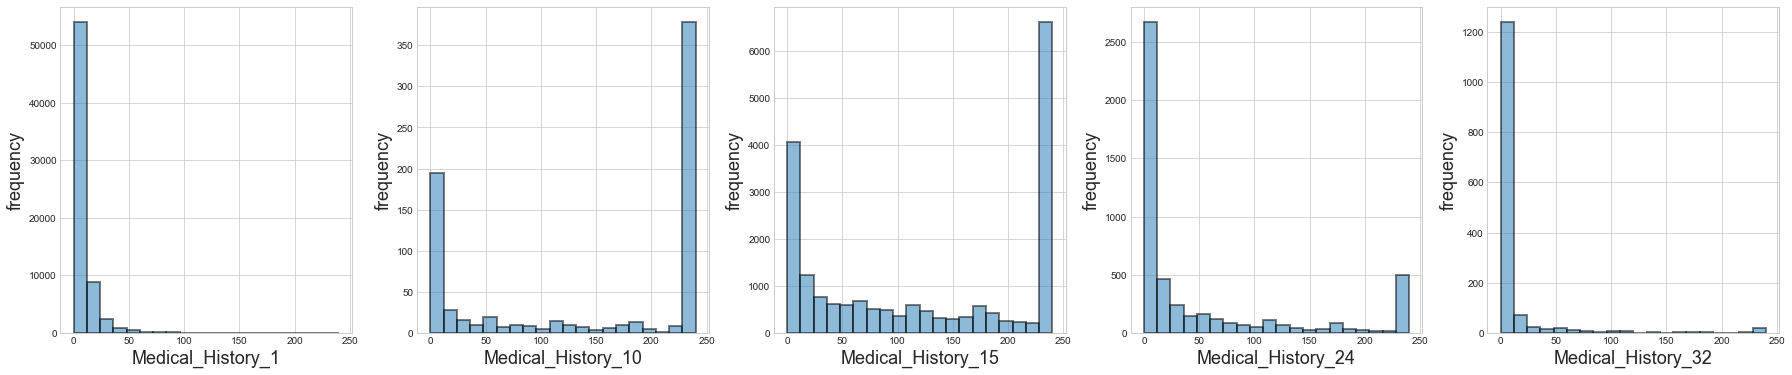

In [16]:
plot_histgrams(discrete_data)

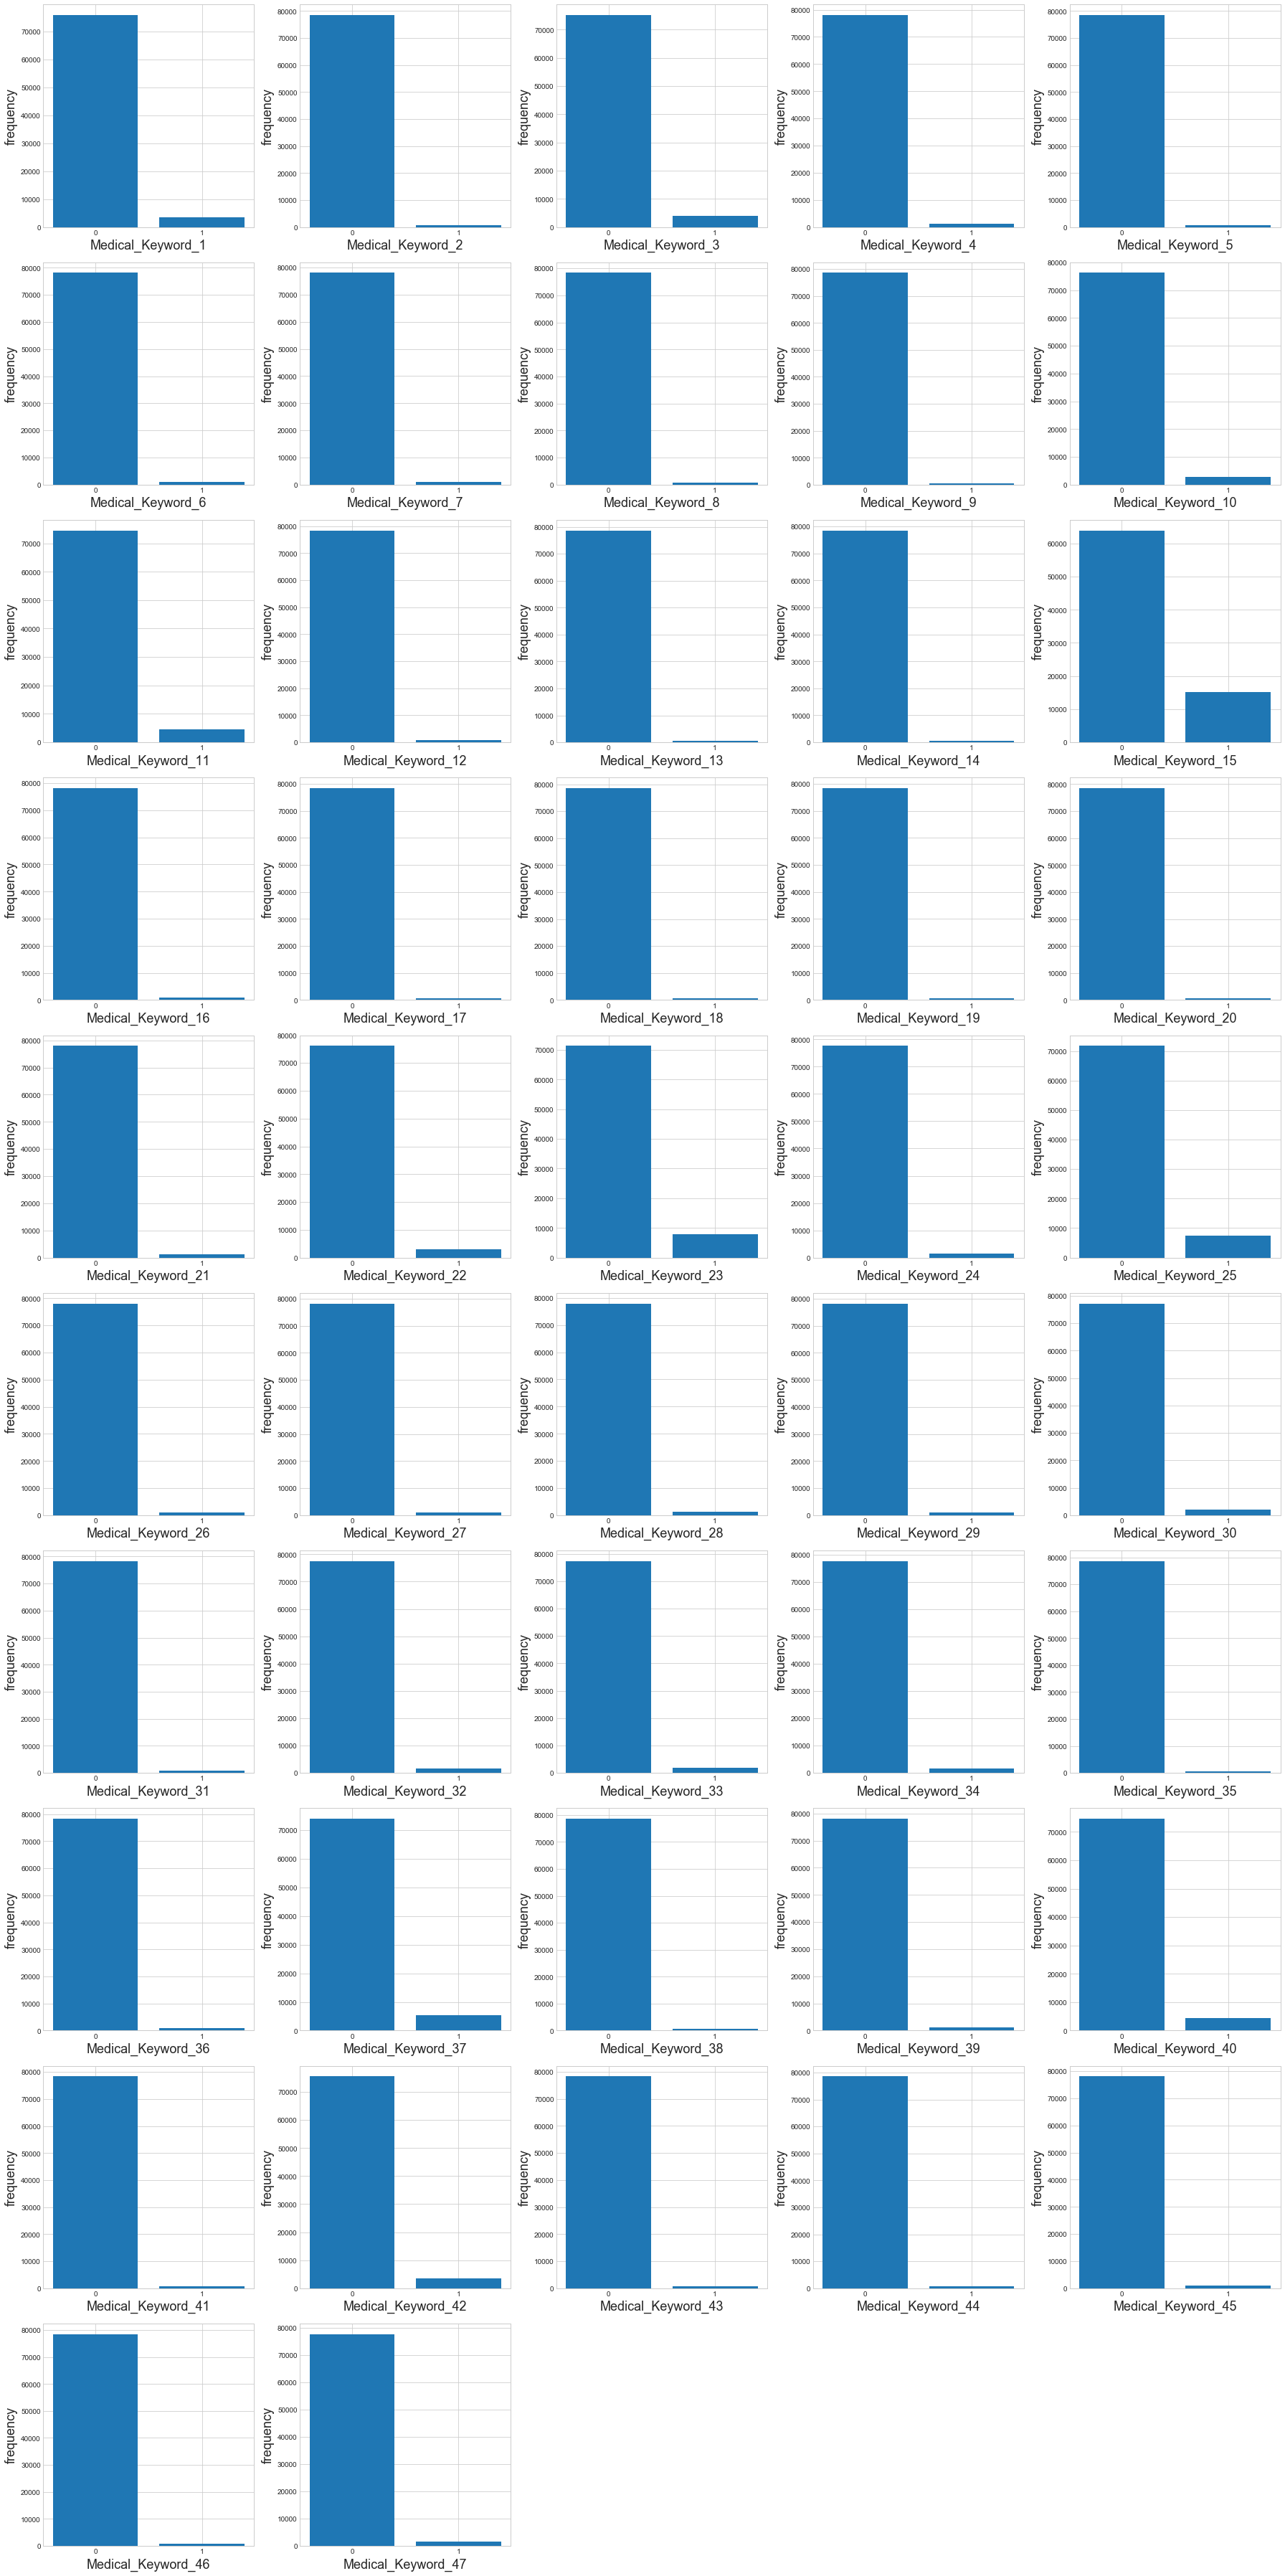

In [17]:
plot_categoricals(dummy_data)

In [18]:
from xgboost.sklearn import XGBClassifier

In [19]:
from xgboost.sklearn import XGBRegressor

In [20]:
import xgboost as xgb

In [21]:
all_data = train.append(test)

In [22]:
all_data['Product_Info_2_char'] = all_data.Product_Info_2.str[0]
all_data['Product_Info_2_num'] = all_data.Product_Info_2.str[1]

In [51]:
all_data

,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,Family_Hist_1,Family_Hist_2,Family_Hist_3,...,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Response,Wt,Product_Info_2_char,Product_Info_2_num,BMI_Age,Med_Keywords_Count
0,0.323008,0.0280,12,1,0.0000,3,0.2500,2,0.463768,0.598039,...,0.076923,2,1,1,8,0.148536,D,0,0.207304,0
1,0.272288,0.0000,1,3,0.0000,2,0.0018,2,0.188406,0.519608,...,0.076923,2,3,1,4,0.131799,A,1,0.016256,0
2,0.428780,0.0300,9,1,0.0000,2,0.0300,3,0.304348,0.519608,...,0.076923,2,3,1,8,0.288703,E,1,0.012799,0
3,0.352438,0.0420,9,1,0.0000,3,0.2000,3,0.420290,0.519608,...,0.487179,2,3,1,8,0.205021,D,2,0.057863,0
4,0.424046,0.0270,9,1,0.0000,2,0.0500,2,0.463768,0.519608,...,0.230769,2,3,1,8,0.234310,D,3,0.177213,0
5,0.364887,0.3250,15,1,0.0000,2,1.0000,2,0.463768,0.294118,...,0.230769,3,1,1,8,0.299163,D,3,0.185166,0
6,0.376587,0.1100,1,3,0.0000,3,0.8000,3,0.594203,0.519608,...,0.166194,2,3,1,8,0.173640,A,4,0.140517,0
7,0.571612,0.1200,12,1,0.0000,2,1.0000,2,0.463768,0.490196,...,0.076923,2,3,1,1,0.403766,D,3,0.349792,0
8,0.362643,0.1650,9,1,0.0000,2,1.0000,3,0.463768,0.529412,...,0.230769,2,3,1,8,0.184100,D,0,0.189440,0
9,0.587796,0.0250,1,3,0.0000,3,0.0500,3,0.797101,0.519608,...,0.076923,2,3,1,1,0.284519,E,1,0.324604,0


In [23]:
all_data['Product_Info_2_num'] = pd.factorize(all_data['Product_Info_2_num'])[0]
all_data['Product_Info_2_num'] = pd.factorize(all_data['Product_Info_2_num'])[0]

In [24]:
all_data['Product_Info_2'] = pd.factorize(all_data['Product_Info_2'])[0]
all_data['BMI_Age'] = all_data['BMI'] * all_data['Ins_Age']

In [28]:
med_keyword_columns = all_data.columns[all_data.columns.str.startswith('Medical_Keyword_')]
all_data['Med_Keywords_Count'] = all_data[med_keyword_columns].sum(axis=1)

In [29]:
all_data['Med_Keywords_Count'] = all_data[med_keyword_columns]
# sum the horizonal, show the number of Medical_Keyword_? of a single sample

In [30]:
# Use -1 for test set, in order to seperate the train and test dataset
all_data['Response'].fillna(-1, inplace=True)

In [31]:
# use the median to full missing value
for i in all_data.columns:
    if all_data[i].dtype == 'float64':
         all_data[i].fillna(all_data[i].median(), inplace=True)

In [32]:
# fix the dtype on the label column
all_data['Response'] = all_data['Response'].astype(int)

In [34]:
test = all_data[all_data['Response']<1].copy() # coz -1 is test's response
train = all_data[all_data['Response']>0].copy()

In [36]:
# its show no missing value
print("Feature   \t         Count\tPct missing")
for column_name, column in all_data.transpose().iterrows():
    naCount = sum(column.isnull())
    if naCount > 0:
       #print column_name, naCount, "Percent missing: %f%%" % 100.*naCount/train.shape[0]
       print("%20s \t%5d  \t%2.2f%%" % (column_name, naCount, 100*naCount/train.shape[0]))

Feature   	         Count	Pct missing


In [59]:
all_data.describe()

,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,Family_Hist_1,Family_Hist_2,Family_Hist_3,...,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Response,Wt,Product_Info_2_num,BMI_Age,Med_Keywords_Count
count,79146.000000,79146.000000,79146.000000,79146.000000,79146.000000,79146.000000,79146.000000,79146.000000,79146.000000,79146.000000,...,79146.000000,79146.000000,79146.000000,79146.000000,79146.000000,79146.000000,79146.000000,79146.000000,79146.000000,79146.000000
mean,0.469773,0.077925,8.592323,1.307053,0.005626,2.144480,0.342282,2.686605,0.469302,0.510503,...,24.392199,0.327810,2.006848,2.669143,1.043540,3.979430,0.292580,1.940288,0.194776,0.042352
std,0.122517,0.082735,4.218494,0.720993,0.031496,0.351578,0.319544,0.482933,0.111153,0.092255,...,5.101213,0.281791,0.082470,0.743138,0.291821,3.575148,0.089365,1.718432,0.111807,0.201392
min,0.000000,0.000000,1.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,1.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.385344,0.035000,9.000000,1.000000,0.000000,2.000000,0.100000,2.000000,0.463768,0.519608,...,26.000000,0.076923,2.000000,3.000000,1.000000,1.000000,0.225941,0.000000,0.104778,0.000000
50%,0.452515,0.060000,9.000000,1.000000,0.000000,2.000000,0.250000,3.000000,0.463768,0.519608,...,26.000000,0.230769,2.000000,3.000000,1.000000,5.000000,0.288703,2.000000,0.185148,0.000000
75%,0.533653,0.100000,9.000000,1.000000,0.000000,2.000000,0.500000,3.000000,0.463768,0.519608,...,26.000000,0.487179,2.000000,3.000000,1.000000,7.000000,0.345188,3.000000,0.269225,0.000000
max,1.000000,1.000000,38.000000,3.000000,1.000000,3.000000,1.000000,3.000000,1.000000,1.000000,...,38.000000,1.000000,3.000000,3.000000,3.000000,8.000000,1.000000,7.000000,0.805970,1.000000


In [63]:
# Scaling
# because of the great variance of attribute 'Employment_Info_2' and 'Product_Info_3', those attributes should be
# scaling by using StandardScaler()
import sklearn.preprocessing as preprocessing


def scaling(data,column):
    scaler = preprocessing.StandardScaler()
    Reshaped=data[column].values.reshape(-1,1)# must reshape the df['Age']
    Scaled= scaler.fit(Reshaped)
    data[column] = scaler.fit_transform(Reshaped, Scaled) # the after change the former

scaling(all_data,'Employment_Info_2')
scaling(all_data,'Product_Info_3')

c:\users\zhaofeng shang\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [67]:
# still need to drop those highly missed value's attributes
columns_to_drop = ['Id', 'Response', 'Medical_History_10','Medical_History_24','Medical_History_15','Medical_History_32',
                  'Product_Info_2','Product_Info_2_char']

In [70]:
# convert data to xgb data structure
xgtrain = xgb.DMatrix(train.drop(columns_to_drop, axis=1), train['Response'].values)

In [71]:
xgtest = xgb.DMatrix(test.drop(columns_to_drop, axis=1), label=test['Response'].values)


In [73]:
def get_params():

    params = {}
    params["objective"] = "reg:linear"
    params["eta"] = 0.05
    params["min_child_weight"] = 240
    params["subsample"] = 1
    params["colsample_bytree"] = 0.67
    params["silent"] = 1
    params["max_depth"] = 6
    plst = list(params.items())

    return plst

In [74]:
# get the parameters for xgboost
plst = get_params()
print(plst)

[('objective', 'reg:linear'), ('eta', 0.05), ('min_child_weight', 240), ('subsample', 1), ('colsample_bytree', 0.67), ('silent', 1), ('max_depth', 6)]


In [75]:
xgb_num_rounds = 800
num_classes = 8
eta_list = [0.05] * 200 
eta_list = eta_list + [0.02] * 500
eat_list = eta_list + [0.01]*100

In [77]:
# train model
model = xgb.train(plst, xgtrain, xgb_num_rounds)

In [78]:
# get preds
train_preds = model.predict(xgtrain, ntree_limit=model.best_iteration)

In [80]:
train_preds

array([ 6.32394743,  5.39502192,  7.21684837, ...,  6.98669243,
        5.49836159,  5.23040247], dtype=float32)

In [84]:
from ml_metrics import quadratic_weighted_kappa
def eval_wrapper(yhat, y):  
    y = np.array(y)
    y = y.astype(int)
    yhat = np.array(yhat)# use clip to let yhat in the range of np.min(y) and np.max(y))
    yhat = np.clip(np.round(yhat), np.min(y), np.max(y)).astype(int)   
    return quadratic_weighted_kappa(yhat, y)

In [85]:
# Kappa系数是一种比例，代表着分类与完全随机的分类产生错误减少的比例。
# 1960年Cohen等提出用Kappa值作为评价判断的一致性程度的指标，
# 实践证明，它是一个描述诊断的一致性的较为理想的指标，
# 因此在临床试验中得到广泛的应用。
# kappa=1 两次判断完全一致
# kappa>=0.75 比较满意的一致程度
# kappa<0.4 不够理想的一致程度
# 根据kappa的计算方法分为简单kappa（simple kappa）和加权kappa（weighted kappa），
# 加权kappa又分为linear weighted kappa和quadratic weighted kappa。
print('Train score is:', eval_wrapper(train_preds, train['Response'])) 

Train score is: 0.6248629991738607


In [92]:
test_preds = model.predict(xgtest, ntree_limit=model.best_iteration)
train_preds = np.clip(train_preds, -0.99, 8.99)
test_preds = np.clip(test_preds, -0.99, 8.99)

In [115]:
preds_out = pd.DataFrame({"Id": test['Id'].values, "Response": test_preds}).astype(int)
preds_out=preds_out = preds_out.set_index('Id')
preds_out[preds_out['Response']==0]=1

In [120]:
from scipy.optimize import fmin_powell

In [124]:
preds_out.to_csv('Submission.csv')